In [1]:
import pandas as pd

In [5]:
df= pd.read_csv(r"C:\Users\gauta\Downloads\Real_Estate.csv")

In [9]:
df.sample(5)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
338,2013-05-29 08:58:35.385038,32.0,169.9803,4,24.954654,121.477766,28.726111
296,2013-04-22 15:12:00.231539,29.3,1447.2860,6,24.997485,121.515560,33.055904
251,2013-03-18 09:33:33.059642,36.1,189.5181,8,25.014305,121.526693,32.957584
410,2013-07-26 17:16:34.019780,11.9,323.6912,2,24.950070,121.483918,33.871347
355,2013-06-16 17:16:57.671165,11.8,1236.5640,8,24.937337,121.537178,21.182575


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [13]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [27]:
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [15]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [31]:
df['Transaction date']=pd.to_datetime(df['Transaction date'],errors='coerce')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sns.set_style("whitegrid")

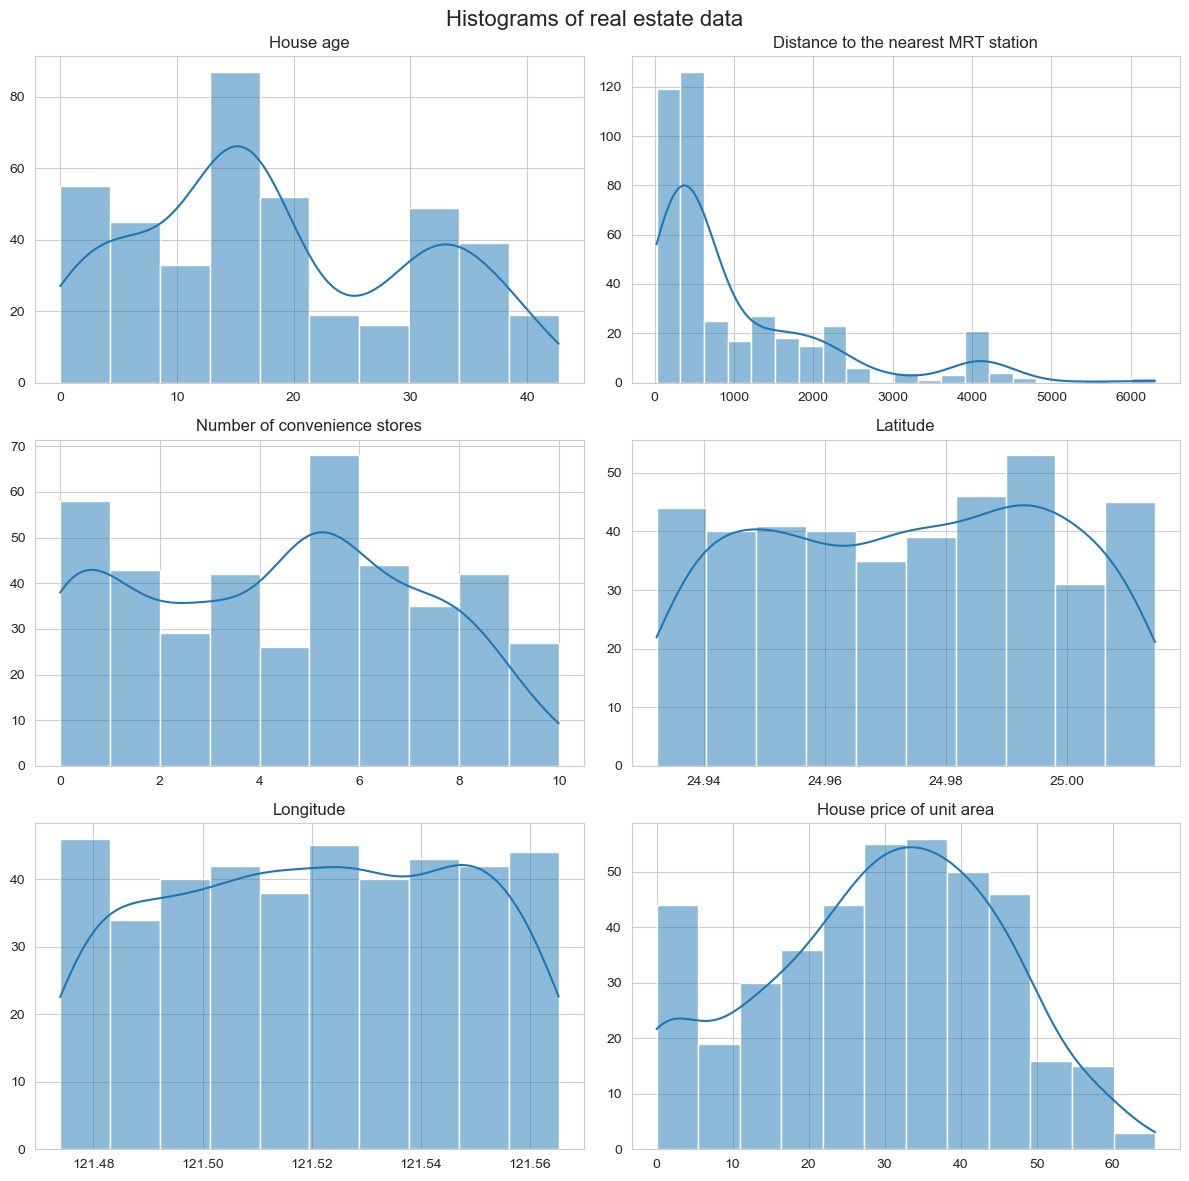

In [21]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
fig.suptitle("Histograms of real estate data",fontsize=16)

cols= ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area'] 
for i,col in enumerate(cols):
    sns.histplot(df[col],kde=True,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    axes[i//2,i%2].set_xlabel("")
    axes[i//2,i%2].set_ylabel("")
plt.tight_layout()
plt.show()

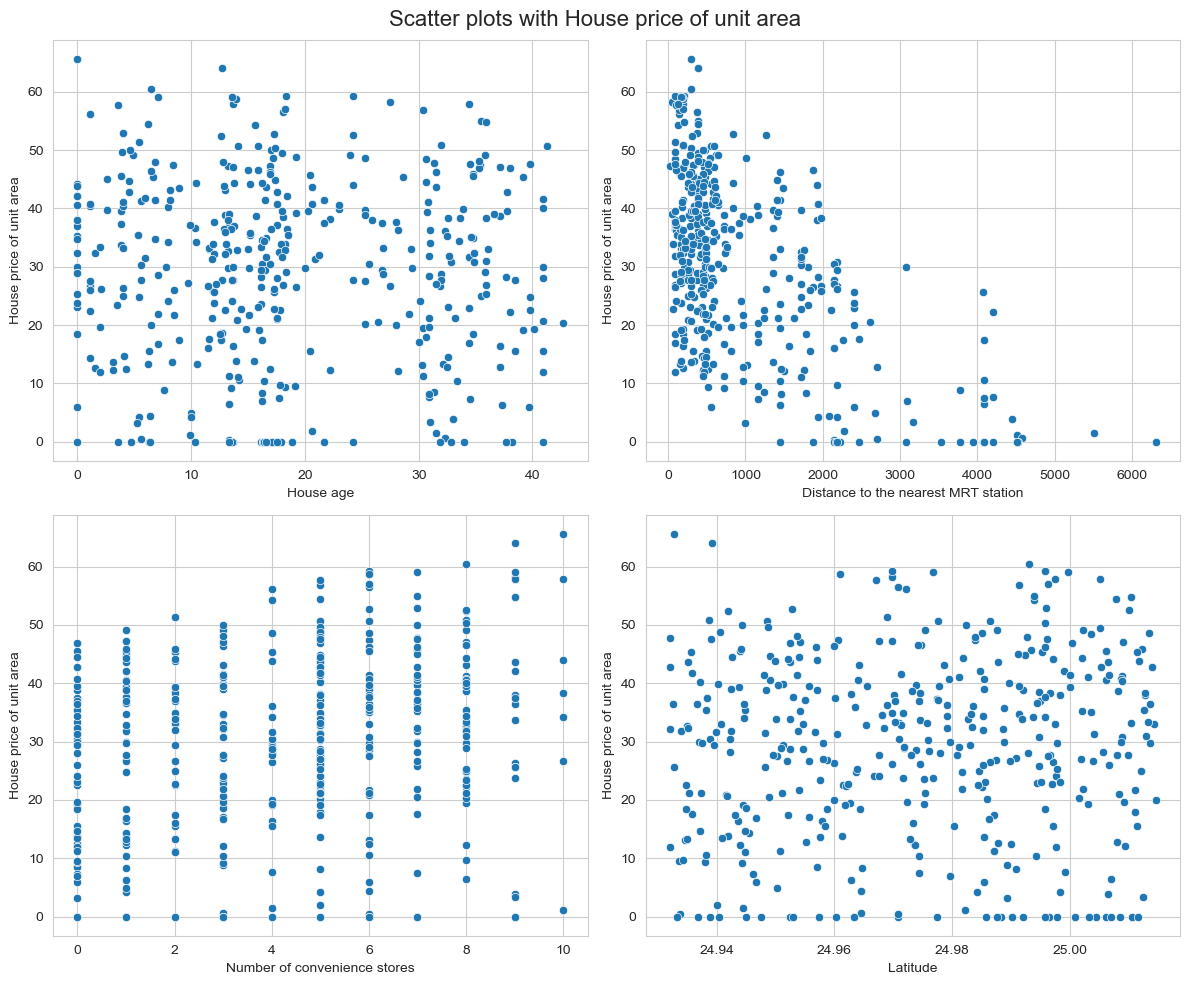

In [23]:
fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(12,10))
fig.suptitle("Scatter plots with House price of unit area",fontsize=16)

sns.scatterplot(data=df,x='House age',y='House price of unit area',ax=axes[0,0])
sns.scatterplot(data=df,x='Distance to the nearest MRT station',y='House price of unit area',ax=axes[0,1])
sns.scatterplot(data=df,x='Number of convenience stores',y='House price of unit area',ax=axes[1,0])
sns.scatterplot(data=df,x='Latitude',y='House price of unit area',ax=axes[1,1])
plt.tight_layout()
plt.show()

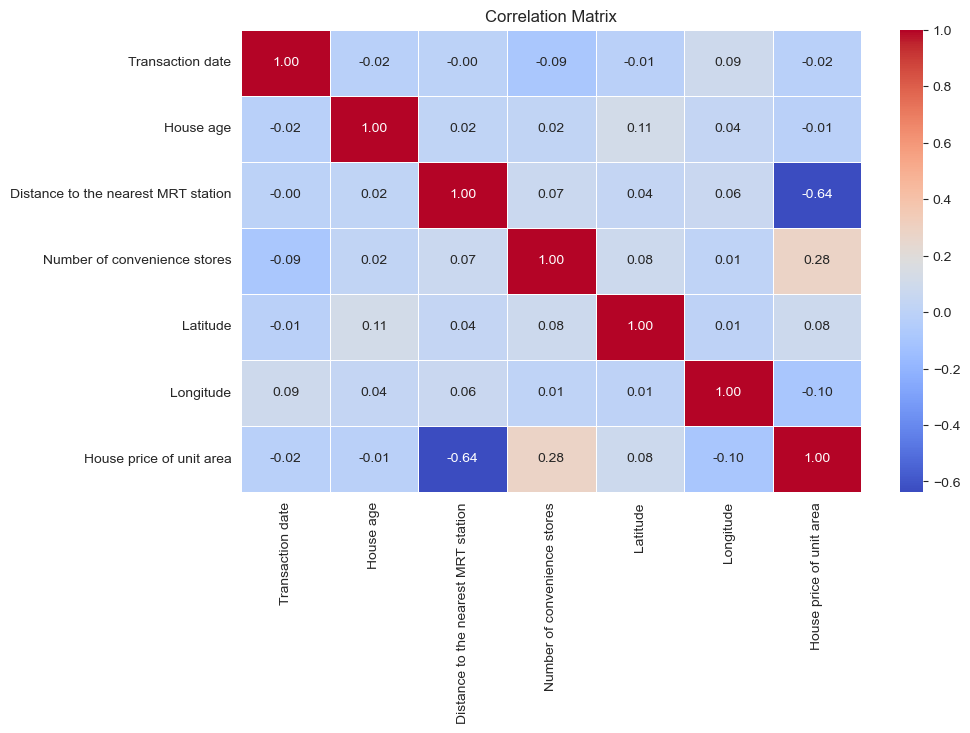

In [33]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
features=['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target='House price of unit area'
X=df[features]
y=df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

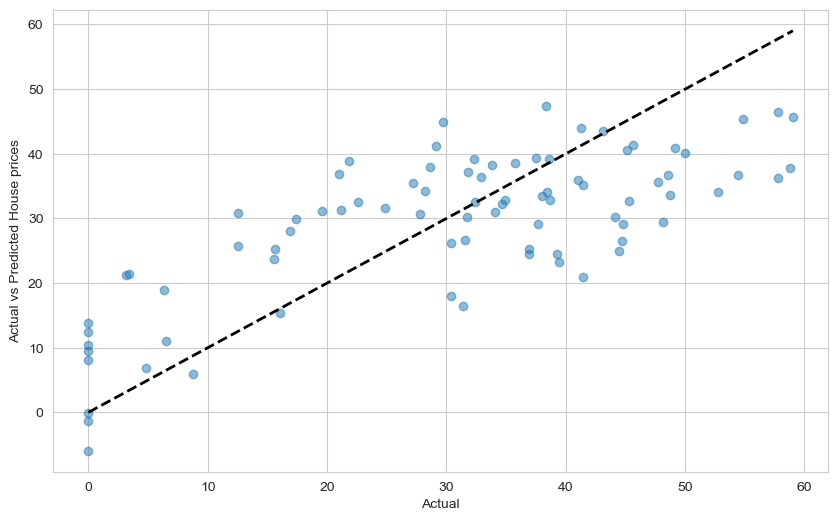

In [41]:
y_pred_lr=model.predict(X_test)
residuals=y_test-y_pred_lr

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_lr,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Actual vs Predicted House prices')
plt.show()